Problem Statement: Detecting hate speech (here: pieces of text indicating racist/sexist remarks)<br>
Tasks Performed: Preprocessing & Cleaning; Visualization & Story Generation; Feature Extraction (BoW, TF-IDF, Word2Vec, Doc2Vec); Sentiment Analysis (Logistic Reg, SVM, RandomForest) <br><br>


NOTE: ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist <br>
Objective: Detect "HATE" speech in the tweets <br><br>
Before begining, looking at the training dataset shows that it is in ('id', 'label', 'tweet') format. <br>

In [1]:
#loading the required libraries

import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
#reading train & test datasets

train = pd.read_csv('train01.csv')
test = pd.read_csv('test01.csv')

In [3]:
#data inspection

#looking at the positive tweets in training data

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [4]:
#looking at the negative tweets in the training set

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [5]:
#checking the dimensions and label-distribution of the train & test data

train.shape, test.shape

((31962, 3), (17197, 2))

In [6]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

Generating insights by looking at the raw data, for example: Here it can be notes that in the training set the negative tweets are about 7% of the entire set. <br>
This implies that it is an imbalanced classification challenge. 

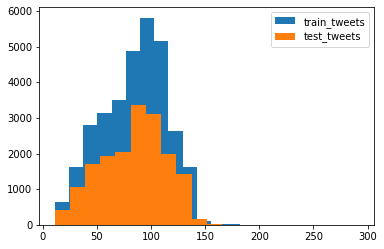

In [7]:
#checking the distribution of length of tweets (in terms of words) in train & test data

length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label='train_tweets')
plt.hist(length_test, bins=20, label="test_tweets")

plt.legend()
plt.show()

In [8]:
#define a function to emove unwanted text patterns from the tweets

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

Here it is important to figure out what needs to be chalked out of the text corpus. For example: For twitter reviews, '@' symbol would appear in almost all tweets but that's not relevant to produce any insight from the data. <br>
Needless to mention, it's better to get rid of punctuations, special characters. <br>
Finally, normalize the text to it's root words. This will help in reducing number of unique words (example: walk, walking - both can be treated as the same word). 

In [9]:
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['tweet'], "@[\w]*")
train.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") #replace anything except alphabets and hashtags
train.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [11]:
#removing short words, pay attention to length of those words which on removal cause no impact to the result
#Here, 3 is an optimum choice

train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [12]:
#Ah! Finally, text normalization
#tokenizing -> stemming -> detokenizing

tokenized_tweet = train['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [13]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
train['tidy_tweet'] = tokenized_tweet
train.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [15]:
#doing the same for the test set

test['tidy_tweet'] = np.vectorize(remove_pattern)(test['tweet'], "@[\w]*")
test['tidy_tweet'] = test['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
test['tidy_tweet'] = test['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

tokenized_tweet2 = test['tidy_tweet'].apply(lambda x: x.split())

tokenized_tweet2 = tokenized_tweet2.apply(lambda x: [stemmer.stem(i) for i in x])

for i in range(len(tokenized_tweet2)):
    tokenized_tweet2[i] = ' '.join(tokenized_tweet2[i])
    
test['tidy_tweet'] = tokenized_tweet2
test.head()

,id,tweet,tidy_tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolif #aislif #requir #passion #dedic #willpow find #newmateri
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacist want everyon #bird #movi here
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe way heal your #acn #altwaystoh #healthi #heal
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",curs child book reserv alreadi where when #harrypott #pottermor #favorit
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",#bihday amaz hilari #nephew ahmir uncl dave love miss


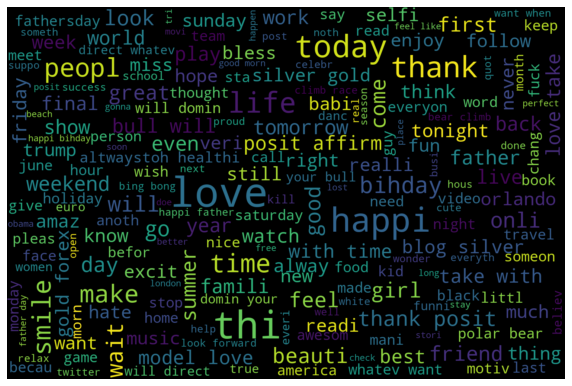

In [16]:
all_words = ' '.join([text for text in train['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1500, height = 1000, random_state = 50, max_font_size = 110).generate(all_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

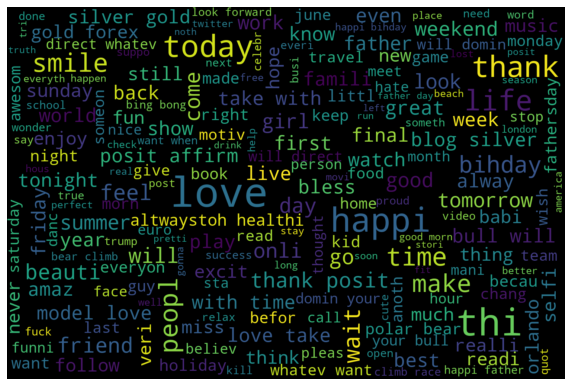

In [17]:
positive_words = ' '.join([text for text in train['tidy_tweet'][train['label'] == 0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1500, height = 1000, random_state = 50, max_font_size = 110).generate(positive_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

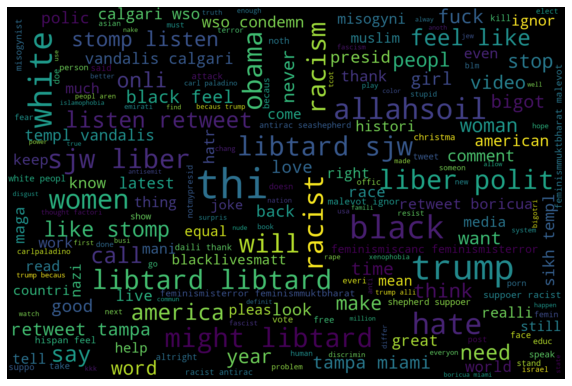

In [18]:
negative_words = ' '.join([text for text in train['tidy_tweet'][train['label'] == 1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1500, height = 1000, random_state = 50, max_font_size = 110).generate(negative_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.
<br>
Thus we will try to understand the impact of Hashtags on tweet sentiments.

In [19]:
#function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

#extracting hashtags from positive tweets
ht_positive = hashtag_extract(train['tidy_tweet'][train['label'] == 0])

#extracting hashtags from negative tweets
ht_negative = hashtag_extract(train['tidy_tweet'][train['label'] == 1])

#un-nesting the list
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])

We have prepared our lists of hashtags for both the sentiments, and now we can plot the top ‘n’ hashtags. <br>
So, first let’s check the hashtags in the non-racist/sexist tweets and then for racist/sexist tweets.

<FreqDist with 19495 samples and 68425 outcomes>


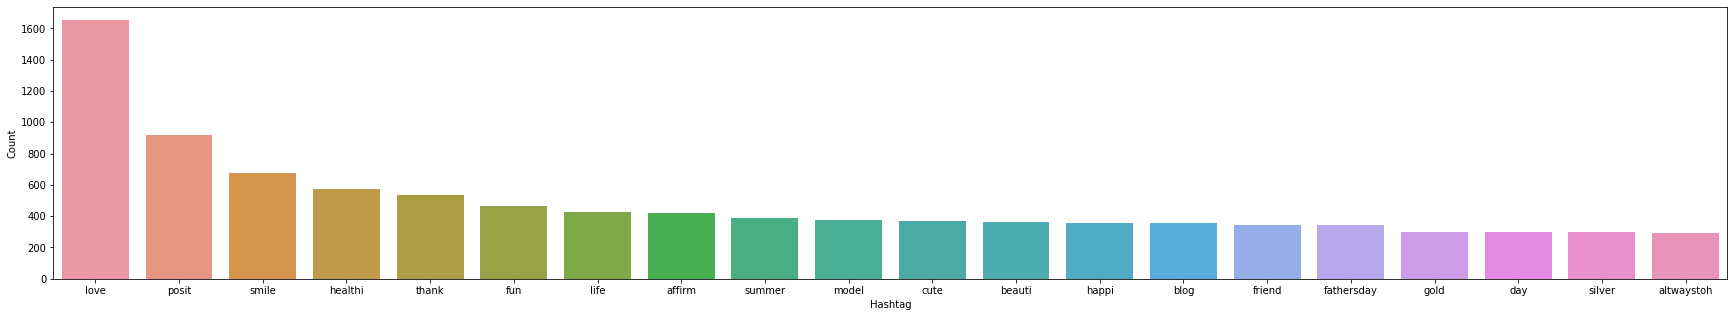

In [20]:
#FOR NON-RACIST/SEXIST TWEETS

a = nltk.FreqDist(ht_positive)
print(a)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

#selecting top 20 most frequent hashtags
d = d.nlargest(columns = "Count", n = 20)

plt.figure(figsize = (30,5))
ax = sns.barplot(data = d, x = "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

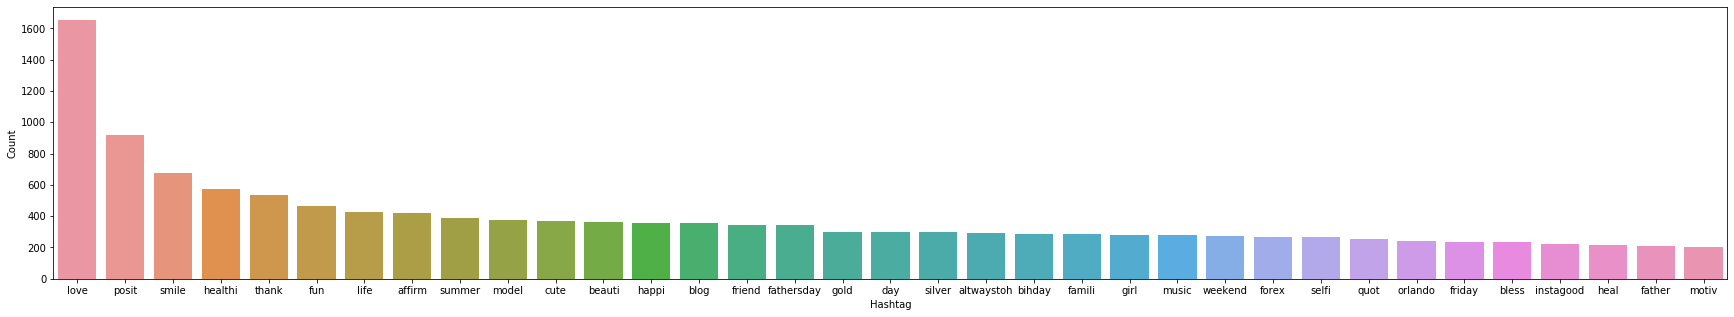

In [21]:
#selecting top 35 most frequent hashtags
d2 = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
d2 = d2.nlargest(columns = "Count", n = 35)

plt.figure(figsize = (30,5))
ax2 = sns.barplot(data = d2, x = "Hashtag", y = "Count")
ax2.set(ylabel = 'Count')
plt.show()

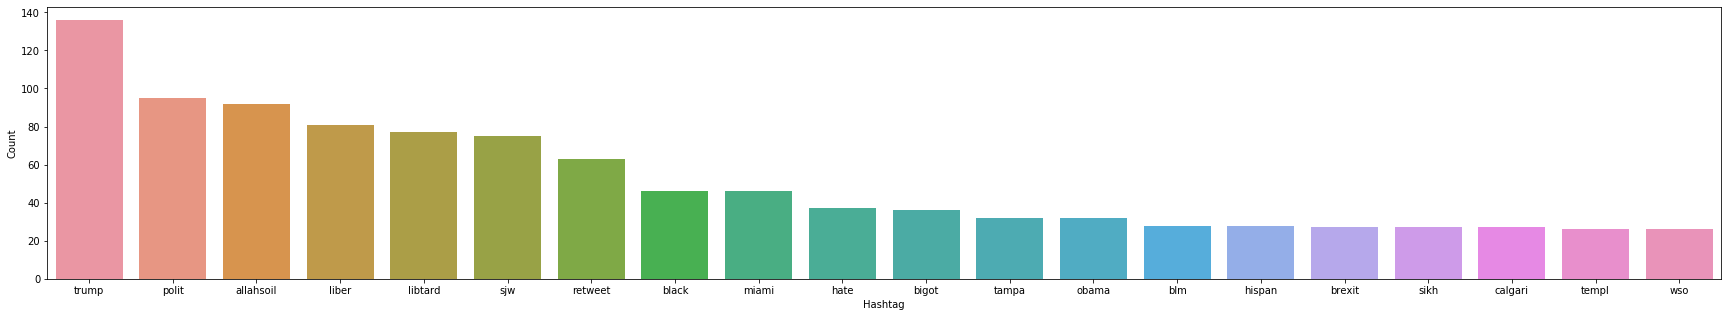

In [22]:
#FOR SEXIST/RACIST TWEETS

b = nltk.FreqDist(ht_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

#selecting top 20 most frequent hashtags
e = e.nlargest(columns = "Count", n = 20)

plt.figure(figsize = (30,5))
bx = sns.barplot(data = e, x = "Hashtag", y = "Count")
bx.set(ylabel = 'Count')
plt.show()

Since hashtags offer useful information it's good to keep them in our dataset. 

In [23]:
#FEATURE EXTRACTION

#BAG-OF-WORDS

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
bow = bow_vectorizer.fit_transform(train['tidy_tweet'])

bow2 = bow_vectorizer.fit_transform(test['tidy_tweet'])

bow.shape
#print(bow)

(31962, 1000)

In [24]:
#TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(train['tidy_tweet'])

tfidf2 = tfidf_vectorizer.fit_transform(test['tidy_tweet'])

tfidf.shape

(31962, 1000)

Training a Word2Vec model on our corpus. 

In [25]:
#tokenizing
tokenized_tweet = train['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet2 = test['tidy_tweet'].apply(lambda x: x.split())

model_w2v = gensim.models.Word2Vec(tokenized_tweet, 
                                   size = 200, 
                                   window = 5, 
                                   min_count = 2, 
                                   sg = 1, 
                                   hs = 0, 
                                   negative = 10, 
                                   workers = 2, 
                                   seed = 34)

model_w2v.train(tokenized_tweet, total_examples = len(train['tidy_tweet']), epochs = 20)
model_w2v.train(tokenized_tweet2, total_examples = len(test['tidy_tweet']), epochs = 20)

(2128760, 2631560)

-- EXTRA NOTES -- 

1. size (int, optional) – Dimensionality of the word vectors.

2. window (int, optional) – Maximum distance between the current and predicted word within a sentence.

3. min_count (int, optional) – Ignores all words with total frequency lower than this.

4. sg ({0, 1}, optional) – Training algorithm: 1 for skip-gram; otherwise CBOW.

5. hs ({0, 1}, optional) – If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.

6. negative (int, optional) – If > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). If set to 0, no negative sampling is used.

7. workers (int, optional) - Use these many worker threads to train the model (=faster training with multicore machines).

8. seed (int, optional) – Seed for the random number generator. Initial vectors for each word are seeded with a hash of the concatenation of word + str(seed). Note that for a fully deterministically-reproducible run, you must also limit the model to a single worker thread (workers=1), to eliminate ordering jitter from OS thread scheduling. (In Python 3, reproducibility between interpreter launches also requires use of the PYTHONHASHSEED environment variable to control hash randomization).


<br>
<br>
Let’s play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [26]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.5741807222366333),
 ('#toast', 0.5735273361206055),
 ('#lovefood', 0.5650104880332947),
 ('#avocado', 0.5574207305908203),
 ('out', 0.527654230594635),
 ('dess', 0.5258508920669556),
 ('#fam', 0.5239472985267639),
 ('kayak', 0.5222989916801453),
 ('mansion', 0.5184962749481201),
 ('#worldofwarcraft', 0.5168886184692383)]

In [27]:
model_w2v.wv.most_similar(positive = "trump")

[('hillari', 0.5487741231918335),
 ('donald', 0.5364327430725098),
 ('potu', 0.5355349183082581),
 ('unstabl', 0.531715989112854),
 ('melo', 0.5275592803955078),
 ('capitalist', 0.5234425067901611),
 ('#delegaterevolt', 0.5166699886322021),
 ('presidenti', 0.5134477615356445),
 ('endors', 0.5042564868927002),
 ('churchil', 0.5030192136764526)]

From the above two examples, we can see that our word2vec model does a good job of finding the most similar words for a given word. But how is it able to do so? That’s because it has learned vectors for every unique word in our data and it uses cosine similarity to find out the most similar vectors (words).

In [28]:
#checking the vector representation of a word from our corpus
model_w2v['food']

array([-0.38870984,  0.16931315, -0.0849947 ,  0.14787781, -1.1845391 ,
        1.2292925 ,  0.8510214 ,  0.86839527,  0.21002454,  0.15582618,
        0.37208396, -0.3180379 ,  0.1256353 , -0.29891622,  0.56358886,
        0.95589316,  0.00628135,  0.3600576 , -0.23013413, -0.76454234,
       -0.8104362 , -0.34115657,  0.01071117,  0.19621427, -0.27828285,
       -0.20877862,  0.49355853,  0.56629264,  0.1703327 ,  0.30227494,
       -0.05152095, -0.5565959 ,  0.6275623 ,  0.36785698, -0.83396965,
        0.5729827 , -0.6184063 ,  0.27988255, -0.5062808 ,  0.12743644,
       -0.3191286 ,  0.09741634, -0.15161283, -0.15817487,  0.115537  ,
        0.3631348 ,  0.5098006 , -0.01402432, -0.02354995, -0.14607275,
       -0.57297444,  0.2539665 ,  0.1989285 ,  0.47986266,  0.272641  ,
        0.37865758,  0.537566  ,  0.59895897, -0.15512452, -0.37369868,
        0.22322223,  0.16156498,  0.08588199,  0.20619583,  0.1287521 ,
       -0.9268576 ,  0.13760726, -0.07993322, -0.3235147 ,  0.40

In [29]:
len(model_w2v['food'])

200

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. 
There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. 
The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

In [30]:
#preparing vectors for tweets

def word_vector(token, size):
    vec= np.zeros(size).reshape((1, size))
    count = 0
    
    for word in token:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1
        except KeyError: 
            # handling the case where the token is not in vocabulary                                     
            continue
        
    if count != 0:
        vec /= count
        
    return vec

#preparing word2vec feature set

wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 200)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(31962, 200)

In [31]:
wordvec_arrays2 = np.zeros((len(tokenized_tweet2), 200))

for i in range(len(tokenized_tweet2)):
    wordvec_arrays2[i, :] = word_vector(tokenized_tweet2[i], 200)

wordvec_df2 = pd.DataFrame(wordvec_arrays2)
wordvec_df2.shape

(17197, 200)

In [32]:
#Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

Training a Word2Vec model on our corpus.

In [33]:
#load the required libraries

from tqdm import tqdm
tqdm.pandas(desc = "progress-bar")
from gensim.models.doc2vec import LabeledSentence

#To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. 
#We can do so by using Gensim’s LabeledSentence() function.

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) #label all the tweets
labeled_tweets2 = add_label(tokenized_tweet2)

/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [34]:
labeled_tweets[:3] 

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2'])]

In [35]:
#Now let’s train a doc2vec model.

model_d2v = gensim.models.Doc2Vec(dm = 1, 
                                  dm_mean = 1,
                                  vector_size = 200,
                                  window = 5,
                                  negative = 7,
                                  min_count = 5,
                                  workers = 3, 
                                  alpha = 0.1,
                                  seed = 23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples = len(train['tidy_tweet']), epochs = 15)

100%|██████████| 31962/31962 [00:00<00:00, 3521179.46it/s]


-- EXTRA NOTES -- 
1. dm ({1,0}, optional) – Defines the training algorithm. If dm=1, ‘distributed memory’ (PV-DM) is used. Otherwise, distributed bag of words (PV-DBOW) is employed.
2. dm_mean ({1,0}, optional) – If 0 , use the sum of the context word vectors. If 1, use the mean. Only applies when dm is used in non-concatenative mode.
3. vector_size (int, optional) – Dimensionality of the feature vectors.
4. window (int, optional) – The maximum distance between the current and predicted word within a sentence.
5. negative (int, optional) – If > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). If set to 0, no negative sampling is used.
6. min_count (int, optional) – Ignores all words with total frequency lower than this.
7. workers (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).
8. alpha (float, optional) – The initial learning rate.
9. seed (int, optional) – Seed for the random number generator. Initial vectors for each word are seeded with a hash of the concatenation of word + str(seed). Note that for a fully deterministically-reproducible run, you must also limit the model to a single worker thread (workers=1), to eliminate ordering jitter from OS thread scheduling. In Python 3, reproducibility between interpreter launches also requires use of the PYTHONHASHSEED environment variable to control hash randomization.

In [36]:
#Preparing doc2vec Feature Set

docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(train)):
    docvec_arrays[i, :] = model_d2v.docvecs[i].reshape((1, 200))

docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(31962, 200)

In [37]:
model_d2v2 = gensim.models.Doc2Vec(dm = 1, 
                                  dm_mean = 1,
                                  vector_size = 200,
                                  window = 5,
                                  negative = 7,
                                  min_count = 5,
                                  workers = 3, 
                                  alpha = 0.1,
                                  seed = 23)

model_d2v2.build_vocab([i for i in tqdm(labeled_tweets2)])
model_d2v2.train(labeled_tweets2, total_examples = len(test['tidy_tweet']), epochs = 15)

100%|██████████| 17197/17197 [00:00<00:00, 3421051.31it/s]


In [38]:
docvec_arrays2 = np.zeros((len(tokenized_tweet2), 200))
for i in range(len(test)):
    docvec_arrays2[i, :] = model_d2v2.docvecs[i].reshape((1, 200))

docvec_df2 = pd.DataFrame(docvec_arrays2)
docvec_df2.shape

(17197, 200)

We are now done with all the pre-modeling stages required to get the data in the proper form and shape.

In [39]:
#MODELING

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#BOW Features
#train_bow = bow
#test_bow = bow2

xtrain_bow, xcsv_bow, ytrain, ycsv = train_test_split(bow, train['label'], 
                                                      random_state = 42, 
                                                      test_size = 0.3)
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)

prediction = lreg.predict_proba(xcsv_bow)
prediction_int = prediction[:, 1] >= 0.3 #if prediction is greater than or equal to 0.3 then 1 else 0 
prediction_int = prediction_int.astype(np.int)

f1_score(ycsv, prediction_int)

0.5353283458021613

In [40]:
test_pred = lreg.predict_proba(bow2)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index = False) 

In [41]:
#TF-IDF

#TF-IDF Features
#train_tfidf = tfidf
#test_tfidf = tfidf2

xtrain_tfidf = tfidf[ytrain.index]
xcsv_tfidf = tfidf[ycsv.index]
lreg.fit(xtrain_tfidf, ytrain)
prediction = lreg.predict_proba(xcsv_tfidf)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(ycsv, prediction_int)

0.5328596802841918

In [68]:
#Word2Vec features

train_w2v = wordvec_df 
test_w2v = wordvec_df2
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xcsv_w2v = train_w2v.iloc[ycsv.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xcsv_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(ycsv, prediction_int)

0.6101190476190477

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(ycsv, prediction_int)

0.9453540515173636

In [43]:
#Doc2Vec features

train_d2v = docvec_df
test_d2v = docvec_df2
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xcsv_d2v = train_d2v.iloc[ycsv.index,:]
lreg.fit(xtrain_d2v, ytrain) 
prediction = lreg.predict_proba(xcsv_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(ycsv, prediction_int)

0.3576388888888889

With Logistic Regression, the following F1 Scores have been obtained:
1. BOW      - 0.5353, 0.5353
2. TF-IDF   - 0.5328, 0.5328
3. Word2Vec - 0.6012, 0.6101
4. Doc2Vec  - 0.3841, 0.3576

In [44]:
#SUPPORT VECTOR MACHINE
from sklearn import svm

#BOW features
svc = svm.SVC(kernel = 'linear', C = 1, probability = True).fit(xtrain_bow, ytrain)
prediction = svc.predict_proba(xcsv_bow)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(ycsv, prediction_int)

0.5032021957913998

In [45]:
test_pred = svc.predict_proba(bow2)
test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test[['id', 'label']]
submission = test[['id', 'label']]
submission.to_csv('sub_svm_bow.csv', index = False)

In [46]:
#TF-IDF features
svc = svm.SVC(kernel = 'linear', C = 1, probability = True).fit(xtrain_tfidf, ytrain)
prediction = svc.predict_proba(xcsv_tfidf)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(ycsv, prediction_int)

0.5202520252025201

In [47]:
#Word2Vec features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xcsv_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(ycsv, prediction_int)

0.6001571091908876

In [48]:
#Doc2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xcsv_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(ycsv, prediction_int)

0.25976768743400214

With SVM, the following F1 Scores have been obtained:

1. BOW - 0.5018, 0.5032
2. TF-IDF - 0.5224, 0.5202
3. Word2Vec - 0.5918, 0.6001
4. Doc2Vec - 0.3088, 0.2597

In [49]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

#BOW features
rf = RandomForestClassifier(n_estimators = 400, random_state = 11).fit(xtrain_bow, ytrain)
prediction = rf.predict(xcsv_bow)
f1_score(ycsv, prediction)

0.5511811023622046

In [50]:
#TF-IDF features
rf = RandomForestClassifier(n_estimators = 400, random_state = 11).fit(xtrain_tfidf, ytrain)
prediction = rf.predict(xcsv_tfidf)
f1_score(ycsv, prediction)

0.5636856368563686

In [51]:
#Word2Vec features
rf = RandomForestClassifier(n_estimators = 400, random_state = 11).fit(xtrain_w2v, ytrain)
prediction = rf.predict(xcsv_w2v)
f1_score(ycsv, prediction)

0.4907306434023992

In [52]:
#Doc2Vec features
rf = RandomForestClassifier(n_estimators = 400, random_state = 11).fit(xtrain_d2v, ytrain)
prediction = rf.predict(xcsv_d2v)
f1_score(ycsv, prediction)

0.05923836389280677

With Random Forest, the following F1 Scores have been obtained:

1. BOW - 0.5511, 0.5511
2. TF-IDF - 0.5636, 0.5636
3. Word2Vec - 0.4881, 0.4907
4. Doc2Vec - 0.097, 0.0592

We see that, Word2Vec & Logistic Regression have given the best perfomance uptill now. Now, we can further tune the model to extract as many features as poosible and improve the accuracy. 

In [71]:
#obtaining final result in a csv file by running Word2Vec test dataset through Logistic regression

test_pred = lreg.predict_proba(test_w2v)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label','tweet']]
submission.to_csv('sub_lreg_doc2vec.csv', index = False)

Voila! The result can be checked in the sub_lreg_doc2vec.csv file, and going through the file it looks good.
<br><br><br><br>
294 lines of code